### Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

### Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

1. Customers who left within the last month – the column is called Churn <br>
2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies <br>
3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges <br>
4. Demographic info about customers – gender, age range, and if they have partners and dependents

# Business Understanding
Kondisi kerugian perusahaan saat ini diakibatkan oleh banyaknya customer yang berhenti berlangganan atau biasa disebut dengan istilah *churn*, sebagai Data Scientist kita perlu memahami **mengapa** churn terjadi dengan jumlah yang besar sehingga Business dapat memberi treatment kepada customer agar tetap loyal.

### Business Metric
1. Meminiminalisir persentase customer yang churn dari 27% menjadi 5%. <br>
2. Memaksimalkan treatment dengan cost yang seminimum mungkin.

# Model Defisini
Memprediksi customer yang akan churn dengan **Keberhasilan Model** yaitu Recall > 80%

# Import Library

In [1]:
#import library 
import pandas as pd #untuk manipulasi data
pd.set_option('max_columns',None)
import numpy as np #untuk manipulasi angka dan operasi math

#import library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Data Understanding & Data Cleaning

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#check summary
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
#check summary statistic for object
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


dari tipe data terlihat hanya kolom TotalCharges yang tidak sesuai, akan dikonvert dari object menjadi float64

In [7]:
#check missing value
100*(df.isnull().sum()/len(df))

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

data tidak memiliki missing value

In [8]:
#check duplicate data
#df.duplicated(subset=['customerID']).sum() jika data besar
df.duplicated().sum()

0

data tidak memiliki duplicated value

In [9]:
#check inconsistence data w/ looping
for x in df.columns:
    print(f'nilai unik dari column {x} :')
    print(f'{df[x].unique()}')
    print('=='*50)

nilai unik dari column customerID :
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
nilai unik dari column gender :
['Female' 'Male']
nilai unik dari column SeniorCitizen :
[0 1]
nilai unik dari column Partner :
['Yes' 'No']
nilai unik dari column Dependents :
['No' 'Yes']
nilai unik dari column tenure :
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
nilai unik dari column PhoneService :
['No' 'Yes']
nilai unik dari column MultipleLines :
['No phone service' 'No' 'Yes']
nilai unik dari column InternetService :
['DSL' 'Fiber optic' 'No']
nilai unik dari column OnlineSecurity :
['No' 'Yes' 'No internet service']
nilai unik dari column OnlineBackup :
['Yes' 'No' 'No internet service']
nilai unik dari column DeviceProtection :
['No' 'Yes' 'No internet service']
nilai unik dari co

kolom MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, dan StreamingMovies memiliki inkonsistensi dalam datanya sehingga harus diubah 

In [10]:
#menghandle inkonsisten data
#menggunakan fungsi replace(nama lama, nama baru)
df['MultipleLines'] = df['MultipleLines'].replace('No phone service','No')
df['OnlineSecurity'] = df['OnlineSecurity'].replace('No internet service','No')
df['OnlineBackup'] = df['OnlineBackup'].replace('No internet service','No')
df['DeviceProtection'] = df['DeviceProtection'].replace('No internet service','No')
df['TechSupport'] = df['TechSupport'].replace('No internet service','No')
df['StreamingTV'] = df['StreamingTV'].replace('No internet service','No')
df['StreamingMovies'] = df['StreamingMovies'].replace('No internet service','No')
df['PaymentMethod'] = df['PaymentMethod'].replace(['Bank transfer (automatic)','Credit card (automatic)'],
                                                  ['Bank transfer','Credit card'])
df['Churn'] = df['Churn'].map({'Yes':1,'No':0})

In [11]:
#check ulang
for x in df.columns:
    print(f'nilai unik dari column {x} :')
    print(f'{df[x].unique()}')
    print('=='*50)

nilai unik dari column customerID :
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
nilai unik dari column gender :
['Female' 'Male']
nilai unik dari column SeniorCitizen :
[0 1]
nilai unik dari column Partner :
['Yes' 'No']
nilai unik dari column Dependents :
['No' 'Yes']
nilai unik dari column tenure :
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
nilai unik dari column PhoneService :
['No' 'Yes']
nilai unik dari column MultipleLines :
['No' 'Yes']
nilai unik dari column InternetService :
['DSL' 'Fiber optic' 'No']
nilai unik dari column OnlineSecurity :
['No' 'Yes']
nilai unik dari column OnlineBackup :
['Yes' 'No']
nilai unik dari column DeviceProtection :
['No' 'Yes']
nilai unik dari column TechSupport :
['No' 'Yes']
nilai unik dari column StreamingTV :
['No' 'Yes']
nil

In [12]:
#filtering
df[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer,52.55,,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.25,,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.75,,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card,56.05,,0
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.85,,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.35,,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.00,,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.70,,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


In [13]:
#merubah spasi dengan np.nan yaitu NaN values
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan)

In [14]:
#merubah tipe data ke float
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [15]:
#cek info ulang
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<AxesSubplot:>

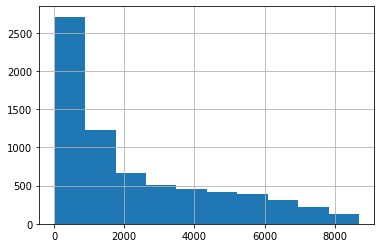

In [16]:
#inputasi missing value
#cek persebaran data pada total charge
df['TotalCharges'].hist()

<AxesSubplot:>

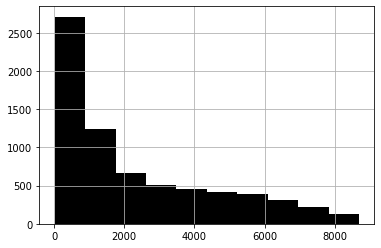

In [17]:
#pendekatan inputasi menggunakan median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
df['TotalCharges'].hist(color='k')

### Feature Engineering

In [18]:
fe = ['InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies']

In [19]:
df["InternetService"] = df["InternetService"].map({'DSL':1, 'Fiber optic':1,
                              'No':0})
df["OnlineSecurity"] = df["OnlineSecurity"].map({'Yes':1,
                              'No':0})
df["OnlineBackup"] = df["OnlineBackup"].map({'Yes':1,
                              'No':0})
df["DeviceProtection"] = df["DeviceProtection"].map({'Yes':1,
                              'No':0})
df["TechSupport"] = df["TechSupport"].map({'Yes':1,
                              'No':0})
df["StreamingTV"] = df["StreamingTV"].map({'Yes':1,
                              'No':0})
df["StreamingMovies"] = df["StreamingMovies"].map({'Yes':1,
                              'No':0})



In [20]:
df['TotalServices'] = df[fe].sum(axis=1)

In [21]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalServices
0,7590-VHVEG,Female,0,Yes,No,1,No,No,1,0,1,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,0,2
1,5575-GNVDE,Male,0,No,No,34,Yes,No,1,1,0,1,0,0,0,One year,No,Mailed check,56.95,1889.50,0,3
2,3668-QPYBK,Male,0,No,No,2,Yes,No,1,1,1,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,1,3
3,7795-CFOCW,Male,0,No,No,45,No,No,1,1,0,1,1,0,0,One year,No,Bank transfer,42.30,1840.75,0,4
4,9237-HQITU,Female,0,No,No,2,Yes,No,1,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,1,1


# EDA (Exploratory Data Analysis)

''

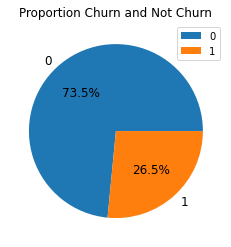

In [22]:
#check perbandingan churn dan tidak churn
plt.pie(df['Churn'].value_counts(),labels=df['Churn'].value_counts().index,
       autopct='%1.1f%%',textprops={'fontsize':12})
        #labels memunculkan Yes/No, autopct memunculkan persentasenya, textprops untuk ukuran text
plt.title('Proportion Churn and Not Churn') #memberi judul
plt.legend() #menampilkan legenda
;

dari 7043 customer terdapat **73,5%** atau sebanyak **5174** customer kita memutuskan untuk **tidak churn**,<br>
dan terdapat **26,5%** atau **1869** memutuskan untuk **churn**

In [23]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [24]:
num = df.select_dtypes(include=['int', 'float']).columns
obj = df.select_dtypes(include=['object']).columns
num

Index(['SeniorCitizen', 'tenure', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'TotalServices'],
      dtype='object')

In [25]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'TotalServices'],
      dtype='object')

In [26]:
obj = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

In [27]:
num = ['tenure', 'MonthlyCharges', 'TotalCharges', 'TotalServices']

## Univariate Analysis

### distribusi data numerik

''

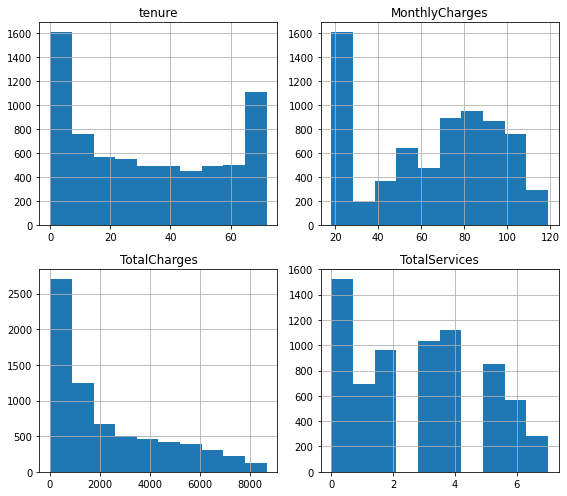

In [28]:
#distribusi data numerik
#atur ukuran gambar menggunakan parameter 'figsize=(a,b)''
df[num].hist(figsize=(8,7))
plt.tight_layout()
;

### distribusi data kategorik

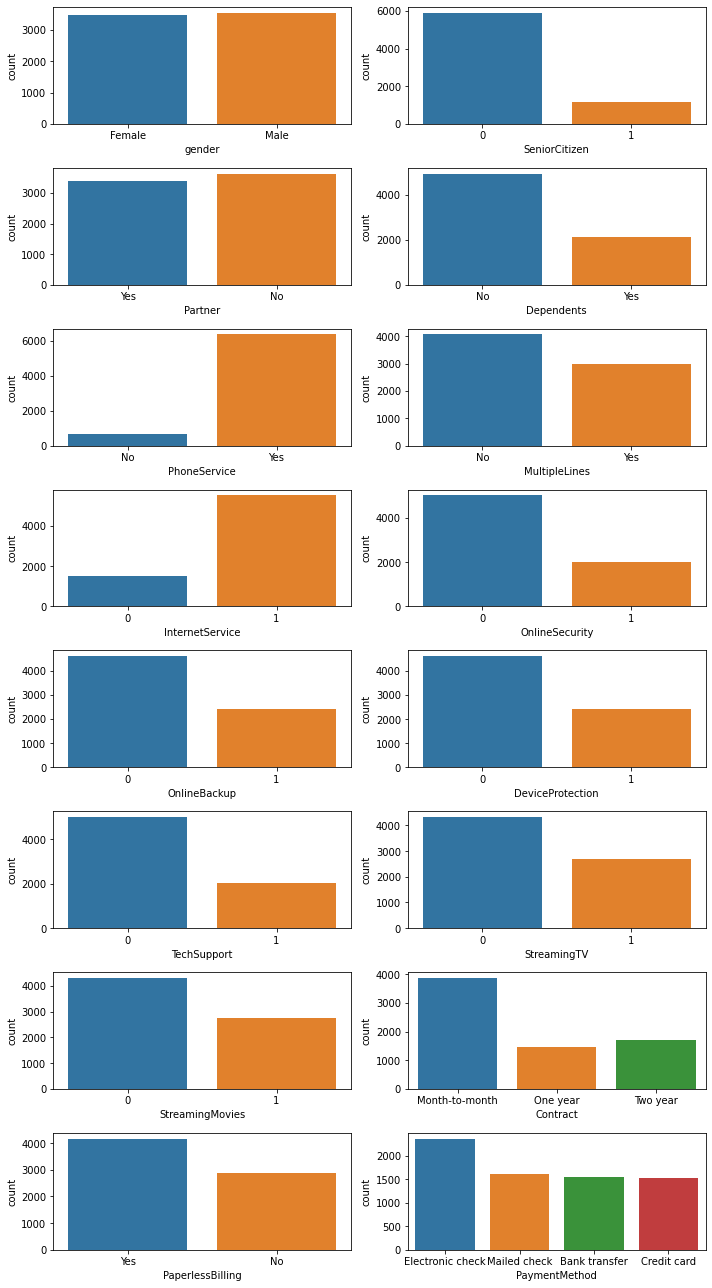

In [29]:
plt.figure(figsize=(10,18))
for x in range(0,len(obj)):
    plt.subplot(8,2,x+1)
    sns.countplot(data=df, x=df[obj[x]])
plt.tight_layout()

## Bivariate Analysis

### kolom numerik vs 'churn'

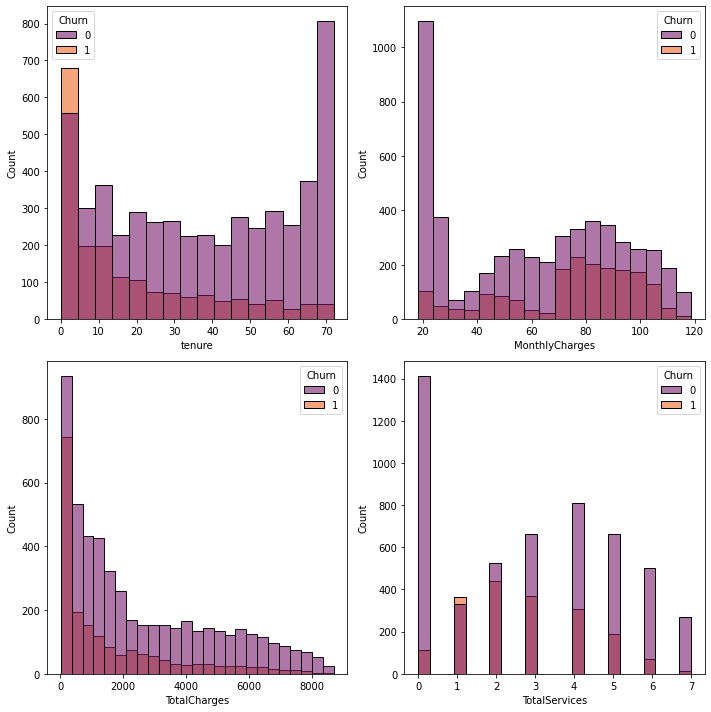

In [30]:
plt.figure(figsize=(10,10))
for x in range(0,len(num)):
    plt.subplot(2,2,x+1)
    sns.histplot(data=df, x=df[num[x]],hue='Churn',palette='inferno',alpha=0.6)
plt.tight_layout()

#### pengaruh kolom numerik terhadap churn dengan aggregasi mean

In [31]:
for x in num:
    print(df.groupby([x]).agg({'Churn':[len,'sum','mean']}))
    print('=='*50)

       Churn               
         len  sum      mean
tenure                     
0         11    0  0.000000
1        613  380  0.619902
2        238  123  0.516807
3        200   94  0.470000
4        176   83  0.471591
...      ...  ...       ...
68       100    9  0.090000
69        95    8  0.084211
70       119   11  0.092437
71       170    6  0.035294
72       362    6  0.016575

[73 rows x 3 columns]
               Churn         
                 len sum mean
MonthlyCharges               
18.25              1   0  0.0
18.40              1   0  0.0
18.55              1   0  0.0
18.70              2   0  0.0
18.75              1   0  0.0
...              ...  ..  ...
118.20             1   0  0.0
118.35             1   1  1.0
118.60             2   0  0.0
118.65             1   0  0.0
118.75             1   0  0.0

[1585 rows x 3 columns]
             Churn         
               len sum mean
TotalCharges               
18.80            1   0  0.0
18.85            2   1  0.5


### kolom kategorik vs 'churn'

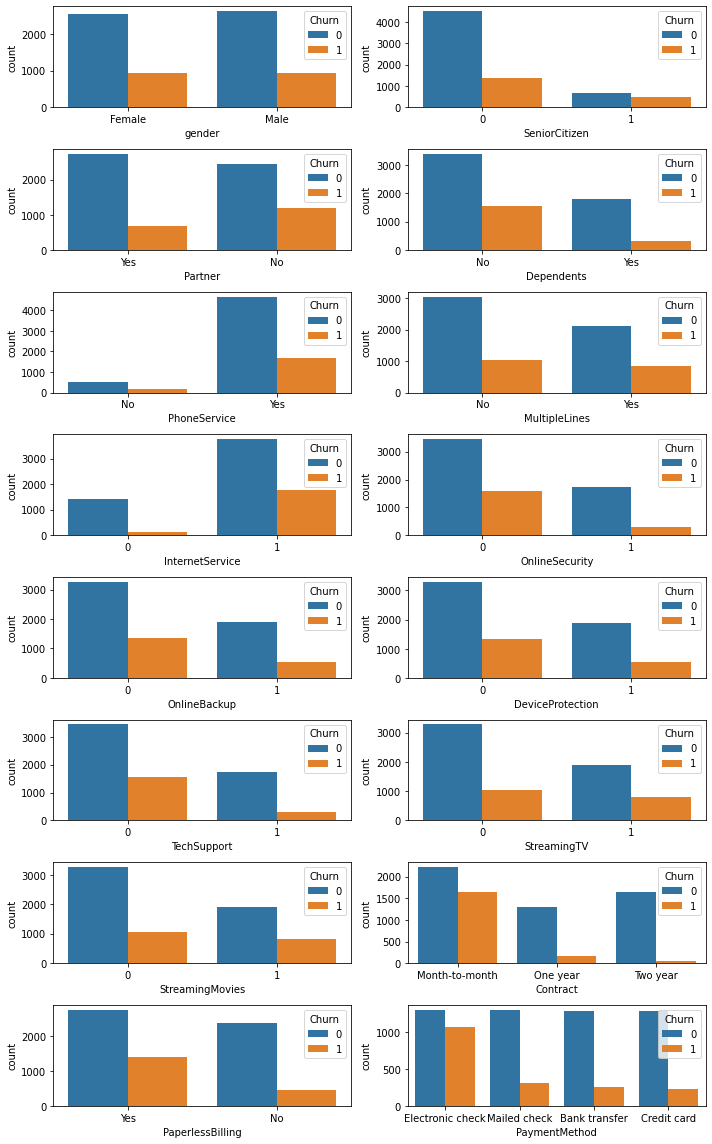

In [32]:
plt.figure(figsize=(10,16))
for x in range(0,len(obj)):
    plt.subplot(8,2,x+1)
    sns.countplot(data=df, x=df[obj[x]], hue='Churn')
plt.tight_layout()

In [33]:
for x in obj:
    print(df.groupby([x]).agg({'Churn':[len,'sum','mean']}))
    print('=='*50)

       Churn               
         len  sum      mean
gender                     
Female  3488  939  0.269209
Male    3555  930  0.261603
              Churn                
                len   sum      mean
SeniorCitizen                      
0              5901  1393  0.236062
1              1142   476  0.416813
        Churn                
          len   sum      mean
Partner                      
No       3641  1200  0.329580
Yes      3402   669  0.196649
           Churn                
             len   sum      mean
Dependents                      
No          4933  1543  0.312791
Yes         2110   326  0.154502
             Churn                
               len   sum      mean
PhoneService                      
No             682   170  0.249267
Yes           6361  1699  0.267096
              Churn                
                len   sum      mean
MultipleLines                      
No             4072  1019  0.250246
Yes            2971   850  0.286099
          

## Multivariate Analysis

Text(0.5, 1.0, 'Contract vs MonthlyCharges')

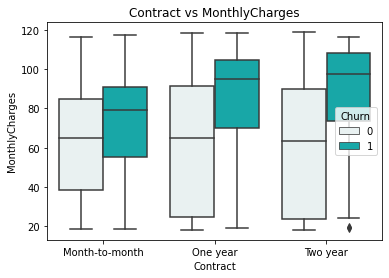

In [34]:
sns.boxplot(data=df, x='Contract',y='MonthlyCharges',color='c',hue='Churn')
plt.title('Contract vs MonthlyCharges')

Text(0.5, 1.0, 'Contract vs MonthlyCharges')

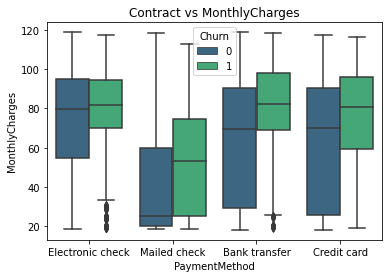

In [35]:
sns.boxplot(data=df, x='PaymentMethod', y='MonthlyCharges', palette='viridis',hue='Churn')
plt.title('Contract vs MonthlyCharges')

<AxesSubplot:xlabel='TotalServices', ylabel='MonthlyCharges'>

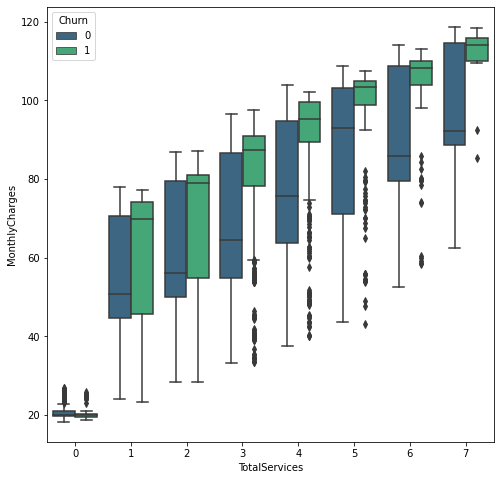

In [36]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df, x='TotalServices', y='MonthlyCharges', hue='Churn', palette='viridis')

In [37]:
(df.groupby('TotalServices').agg({'Churn':[len,'sum','mean']}))

Churn               
                len  sum      mean
TotalServices                     
0              1526  113  0.074050
1               693  362  0.522367
2               966  442  0.457557
3              1033  370  0.358180
4              1118  306  0.273703
5               852  190  0.223005
6               571   71  0.124343
7               284   15  0.052817

<AxesSubplot:xlabel='TotalServices'>

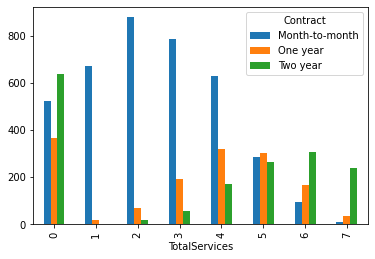

In [38]:
pd.crosstab(df['TotalServices'],  df['Contract']).plot(kind='bar')

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

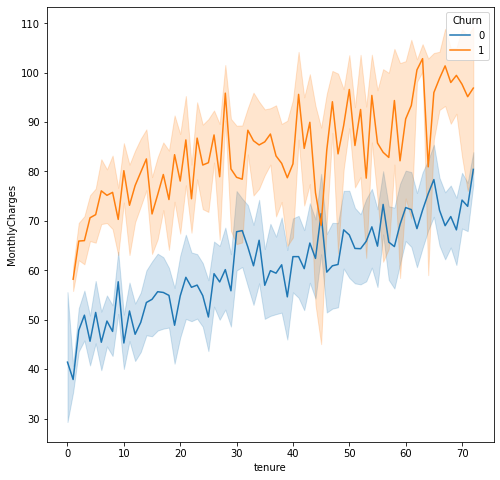

In [39]:
plt.figure(figsize=(8,8))
sns.lineplot(data=df,x='tenure', y='MonthlyCharges', hue='Churn')

# Data Pre-Processing

### check outliers

In [40]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
TotalServices         int64
dtype: object

<AxesSubplot:>

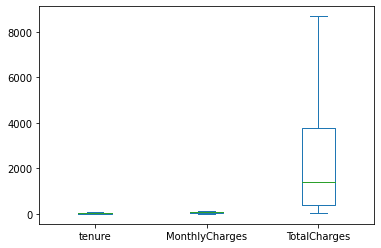

In [41]:
var = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[var].plot(kind='box')

''

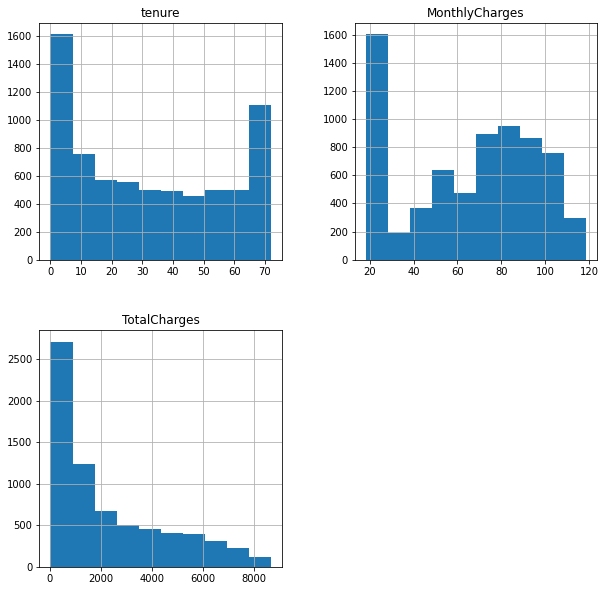

In [42]:
#check distribusi
df[var].hist(figsize=(10,10))
;

''

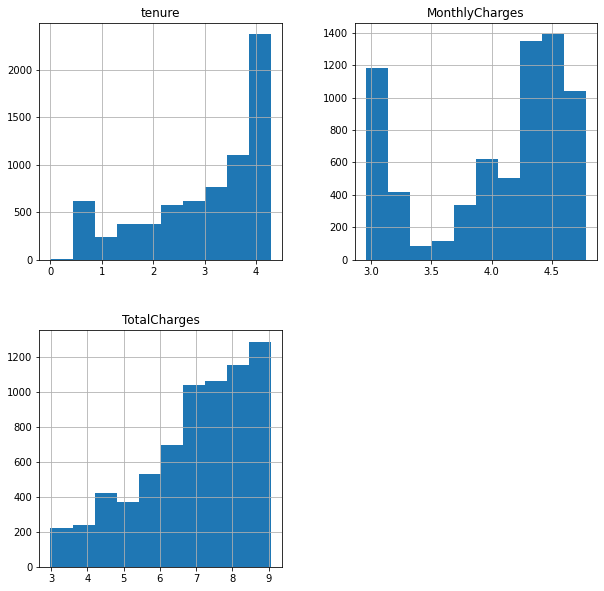

In [43]:
#handling distribution menggunakan METODE LOGARITMA
np.log1p(df[var]).hist(figsize=(10,10))
;

array([[<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>],
       [<AxesSubplot:title={'center':'TotalCharges'}>, <AxesSubplot:>]],
      dtype=object)

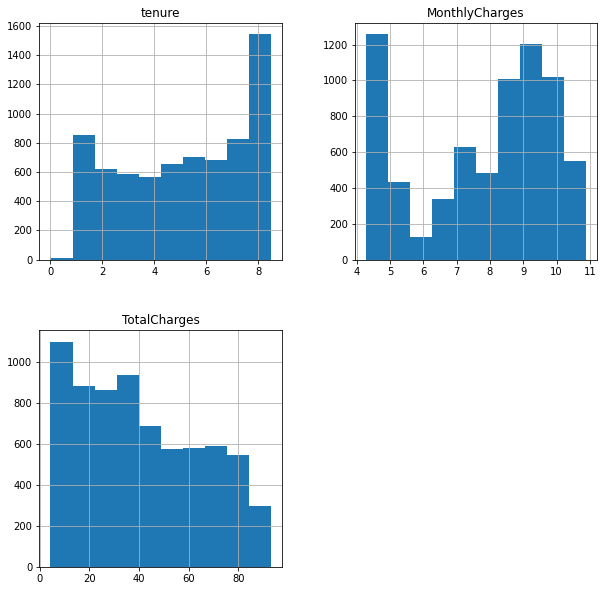

In [44]:
#metode kedua handling metode akar
np.sqrt(df[var]).hist(figsize=(10,10))

In [45]:
#1.tenure dipertahin bentuk asli
#2.monthly dipertahin bentuk
#3.totalcharges di transformasi metode akar kuadrat

df['TotalCharges'] = np.sqrt(df['TotalCharges'])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalServices
0,7590-VHVEG,Female,0,Yes,No,1,No,No,1,0,1,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,5.463515,0,2
1,5575-GNVDE,Male,0,No,No,34,Yes,No,1,1,0,1,0,0,0,One year,No,Mailed check,56.95,43.468379,0,3
2,3668-QPYBK,Male,0,No,No,2,Yes,No,1,1,1,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,10.399519,1,3
3,7795-CFOCW,Male,0,No,No,45,No,No,1,1,0,1,1,0,0,One year,No,Bank transfer,42.30,42.903963,0,4
4,9237-HQITU,Female,0,No,No,2,Yes,No,1,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,12.314625,1,1


In [46]:
#handling categoric
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
TotalServices         int64
dtype: object

In [47]:
#check unik
for x in df.columns:
    print(f'Unik dari colom {x}')
    print(f'{df[x].unique()}')
    print('=='*50)

Unik dari colom customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unik dari colom gender
['Female' 'Male']
Unik dari colom SeniorCitizen
[0 1]
Unik dari colom Partner
['Yes' 'No']
Unik dari colom Dependents
['No' 'Yes']
Unik dari colom tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unik dari colom PhoneService
['No' 'Yes']
Unik dari colom MultipleLines
['No' 'Yes']
Unik dari colom InternetService
[1 0]
Unik dari colom OnlineSecurity
[0 1]
Unik dari colom OnlineBackup
[1 0]
Unik dari colom DeviceProtection
[0 1]
Unik dari colom TechSupport
[0 1]
Unik dari colom StreamingTV
[0 1]
Unik dari colom StreamingMovies
[0 1]
Unik dari colom Contract
['Month-to-month' 'One year' 'Two year']
Unik dari colom PaperlessBilling
['Yes' 'No']
Unik dari colom PaymentMethod
['Ele

In [48]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'TotalServices'],
      dtype='object')

In [49]:
df= df.drop(['customerID','InternetService',
       'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies'],axis=1)

In [50]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalServices
0,Female,0,Yes,No,1,No,No,Month-to-month,Yes,Electronic check,29.85,5.463515,0,2
1,Male,0,No,No,34,Yes,No,One year,No,Mailed check,56.95,43.468379,0,3
2,Male,0,No,No,2,Yes,No,Month-to-month,Yes,Mailed check,53.85,10.399519,1,3
3,Male,0,No,No,45,No,No,One year,No,Bank transfer,42.30,42.903963,0,4
4,Female,0,No,No,2,Yes,No,Month-to-month,Yes,Electronic check,70.70,12.314625,1,1


### convert categorical to numerical

In [51]:
#handling contract and gender
df["Contract"] = df["Contract"].map({'Month-to-month':0,
                              'One year':1,
                              'Two year':2})

df["gender"] = df["gender"].map({'Male':1,
                              'Female':0})

In [52]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalServices
0,0,0,Yes,No,1,No,No,0,Yes,Electronic check,29.85,5.463515,0,2
1,1,0,No,No,34,Yes,No,1,No,Mailed check,56.95,43.468379,0,3
2,1,0,No,No,2,Yes,No,0,Yes,Mailed check,53.85,10.399519,1,3
3,1,0,No,No,45,No,No,1,No,Bank transfer,42.30,42.903963,0,4
4,0,0,No,No,2,Yes,No,0,Yes,Electronic check,70.70,12.314625,1,1


In [53]:
#membuat fungsi untuk handling nominal yang yes dan no
def convert(x):
    if x=="Yes":
        return 1
    else:
        return 0

In [54]:
#gunakan fungsi apply untuk mengaplikasikan fungsi yang telah dibikin yaitu convert
for x in ['Partner','Dependents','PhoneService','MultipleLines','PaperlessBilling']:
    df[x] = df[x].apply(convert)

In [55]:
#handling PaymentMethod
#gunakan pd.get_dummies

dummies1 = pd.get_dummies(df['PaymentMethod'],prefix="Payment")

In [56]:
#gabungkan dummies dengan kolom df
#gabungkaan kolom metode concat
df = pd.concat([df,dummies1],axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalServices,Payment_Bank transfer,Payment_Credit card,Payment_Electronic check,Payment_Mailed check
0,0,0,1,0,1,0,0,0,1,Electronic check,29.85,5.463515,0,2,0,0,1,0
1,1,0,0,0,34,1,0,1,0,Mailed check,56.95,43.468379,0,3,0,0,0,1
2,1,0,0,0,2,1,0,0,1,Mailed check,53.85,10.399519,1,3,0,0,0,1
3,1,0,0,0,45,0,0,1,0,Bank transfer,42.30,42.903963,0,4,1,0,0,0
4,0,0,0,0,2,1,0,0,1,Electronic check,70.70,12.314625,1,1,0,0,1,0


In [57]:
df= df.drop(['PaymentMethod'],axis=1)

In [58]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,TotalServices,Payment_Bank transfer,Payment_Credit card,Payment_Electronic check,Payment_Mailed check
0,0,0,1,0,1,0,0,0,1,29.85,5.463515,0,2,0,0,1,0
1,1,0,0,0,34,1,0,1,0,56.95,43.468379,0,3,0,0,0,1
2,1,0,0,0,2,1,0,0,1,53.85,10.399519,1,3,0,0,0,1
3,1,0,0,0,45,0,0,1,0,42.30,42.903963,0,4,1,0,0,0
4,0,0,0,0,2,1,0,0,1,70.70,12.314625,1,1,0,0,1,0


In [59]:
df.dtypes

gender                        int64
SeniorCitizen                 int64
Partner                       int64
Dependents                    int64
tenure                        int64
PhoneService                  int64
MultipleLines                 int64
Contract                      int64
PaperlessBilling              int64
MonthlyCharges              float64
TotalCharges                float64
Churn                         int64
TotalServices                 int64
Payment_Bank transfer         uint8
Payment_Credit card           uint8
Payment_Electronic check      uint8
Payment_Mailed check          uint8
dtype: object

### Scalling

In [60]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'Contract', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'TotalServices',
       'Payment_Bank transfer', 'Payment_Credit card',
       'Payment_Electronic check', 'Payment_Mailed check'],
      dtype='object')

In [61]:
#scalling
#metode standard scaller
#yang di scalling hanya predictor
var = ['tenure', 'Contract',
       'MonthlyCharges', 'TotalCharges', 'TotalServices']

In [62]:
#library scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [63]:
df[var] = scaler.fit_transform(df[var])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,TotalServices,Payment_Bank transfer,Payment_Credit card,Payment_Electronic check,Payment_Mailed check
0,0,0,1,0,-1.277445,0,0,-0.828207,1,-1.160323,-1.449035,0,-0.388596,0,0,1,0
1,1,0,0,0,0.066327,1,0,0.371271,0,-0.259629,0.100847,0,0.084585,0,0,0,1
2,1,0,0,0,-1.236724,1,0,-0.828207,1,-0.362660,-1.247739,1,0.084585,0,0,0,1
3,1,0,0,0,0.514251,0,0,0.371271,0,-0.746535,0.077829,0,0.557767,1,0,0,0
4,0,0,0,0,-1.236724,1,0,-0.828207,1,0.197365,-1.169639,1,-0.861777,0,0,1,0


In [64]:
#check missing value
100*(df.isnull().sum()/len(df))

gender                      0.0
SeniorCitizen               0.0
Partner                     0.0
Dependents                  0.0
tenure                      0.0
PhoneService                0.0
MultipleLines               0.0
Contract                    0.0
PaperlessBilling            0.0
MonthlyCharges              0.0
TotalCharges                0.0
Churn                       0.0
TotalServices               0.0
Payment_Bank transfer       0.0
Payment_Credit card         0.0
Payment_Electronic check    0.0
Payment_Mailed check        0.0
dtype: float64

<AxesSubplot:>

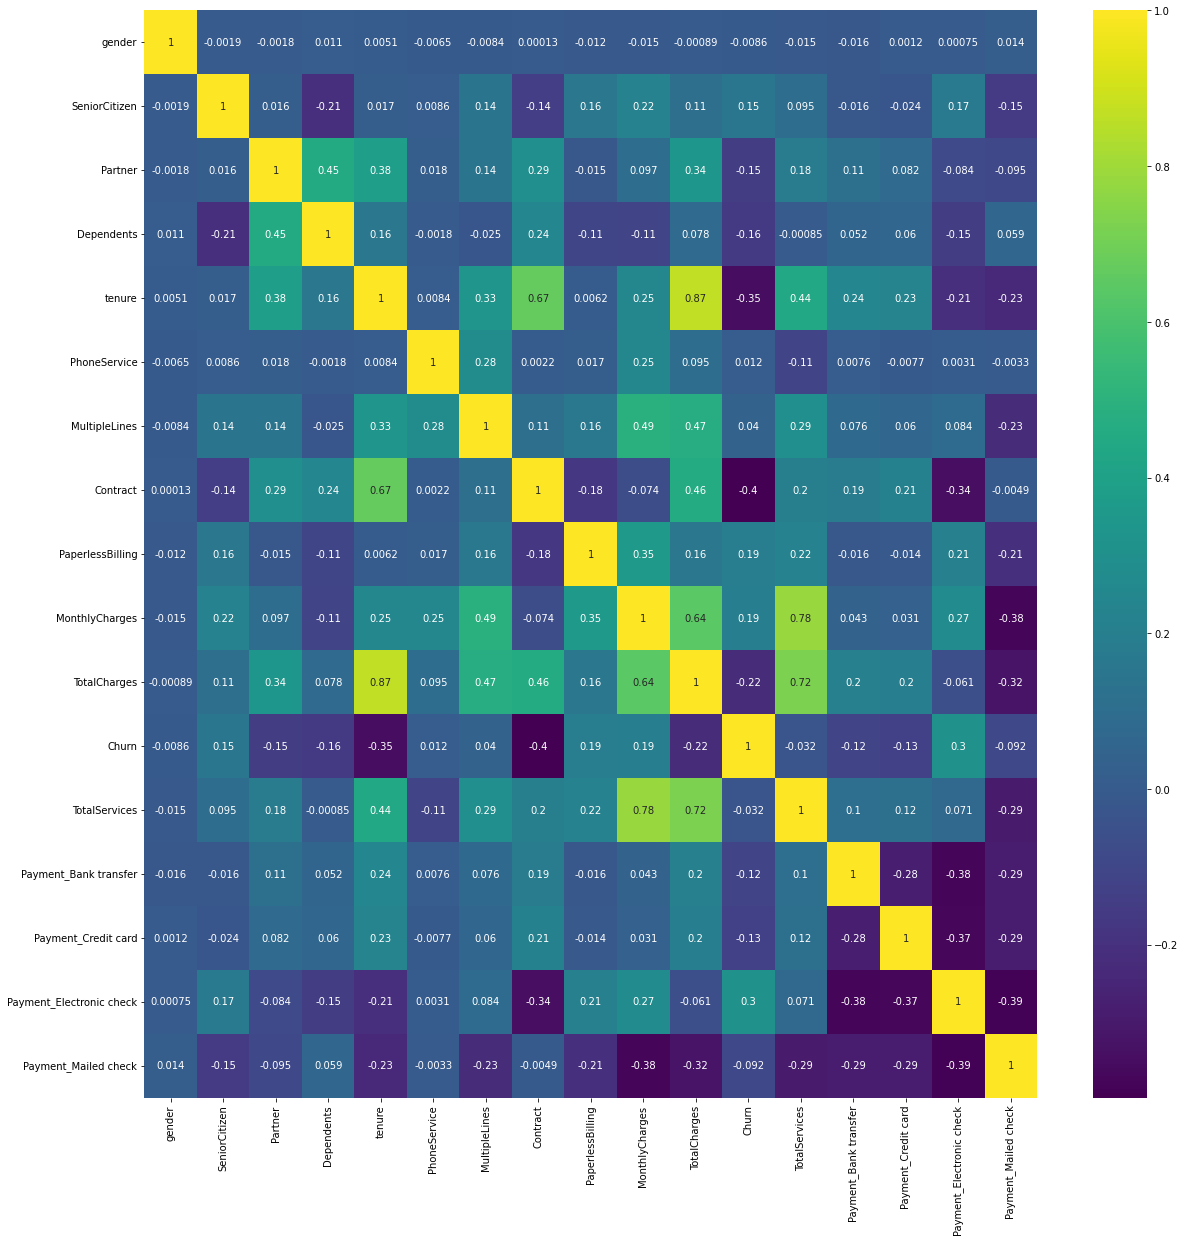

In [65]:
#handling multicolieanrity
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [66]:
#buang kolom totalcharges karena memiliki korelasi yang sama dengan tenure,
#tetapi korelasi terhadap target kecil
df = df.drop('TotalCharges',axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,PaperlessBilling,MonthlyCharges,Churn,TotalServices,Payment_Bank transfer,Payment_Credit card,Payment_Electronic check,Payment_Mailed check
0,0,0,1,0,-1.277445,0,0,-0.828207,1,-1.160323,0,-0.388596,0,0,1,0
1,1,0,0,0,0.066327,1,0,0.371271,0,-0.259629,0,0.084585,0,0,0,1
2,1,0,0,0,-1.236724,1,0,-0.828207,1,-0.362660,1,0.084585,0,0,0,1
3,1,0,0,0,0.514251,0,0,0.371271,0,-0.746535,0,0.557767,1,0,0,0
4,0,0,0,0,-1.236724,1,0,-0.828207,1,0.197365,1,-0.861777,0,0,1,0


# Machine Learning

In [67]:
#definisikan variable
X = df.drop('Churn', axis=1)
y = df['Churn']

In [68]:
#proporsi 70% training dan 30% testing
#memanggil library membagi
from sklearn.model_selection import train_test_split

#library machine learning
#machine learning logistic regression
from sklearn.linear_model import LogisticRegression

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y)

## Logistic Regression

In [70]:
#bangun model

logreg = LogisticRegression(random_state=42)

In [71]:
logreg.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [72]:
#cari hasil training dan testing
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

In [73]:
#import model evaluasi
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3622
           1       0.67      0.54      0.60      1308

    accuracy                           0.81      4930
   macro avg       0.76      0.72      0.73      4930
weighted avg       0.80      0.81      0.80      4930



Text(33.0, 0.5, 'Aktual')

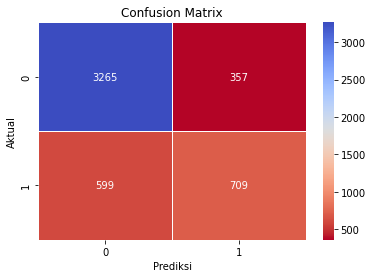

In [74]:
#DATA TRAIN
cnf_matrix = confusion_matrix(y_train, y_train_pred)
print(classification_report(y_train, y_train_pred))
sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

In [75]:
print("Accuracy Training data : ",metrics.accuracy_score(y_train,y_train_pred))
print("Recall Training data : ",metrics.recall_score(y_train,y_train_pred))
print("Precision Training data : ",metrics.precision_score(y_train,y_train_pred))
print("F-1 Training data : ",metrics.f1_score(y_train,y_train_pred))

Accuracy Training data :  0.8060851926977688
Recall Training data :  0.5420489296636085
Precision Training data :  0.6651031894934334
F-1 Training data :  0.5973041280539174


              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1552
           1       0.64      0.57      0.60       561

    accuracy                           0.80      2113
   macro avg       0.75      0.73      0.73      2113
weighted avg       0.79      0.80      0.80      2113



Text(33.0, 0.5, 'Aktual')

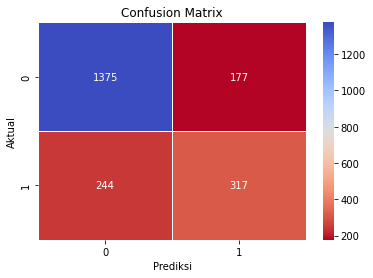

In [76]:
#DATA TEST
cnf_matrix = confusion_matrix(y_test, y_test_pred)
print(classification_report(y_test, y_test_pred))
sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

In [77]:
print("Accuracy Testing data : ",metrics.accuracy_score(y_test,y_test_pred))
print("Recall Testing data : ",metrics.recall_score(y_test,y_test_pred))
print("Precision Testing data : ",metrics.precision_score(y_test,y_test_pred))
print("F-1 Testing data : ",metrics.f1_score(y_test,y_test_pred))

Accuracy Testing data :  0.8007572172266919
Recall Testing data :  0.5650623885918004
Precision Testing data :  0.6417004048582996
F-1 Testing data :  0.6009478672985782


### ROC/AOC curve

In [78]:
from jcopml.plot import plot_classification_report, plot_confusion_matrix, plot_roc_curve, plot_pr_curve

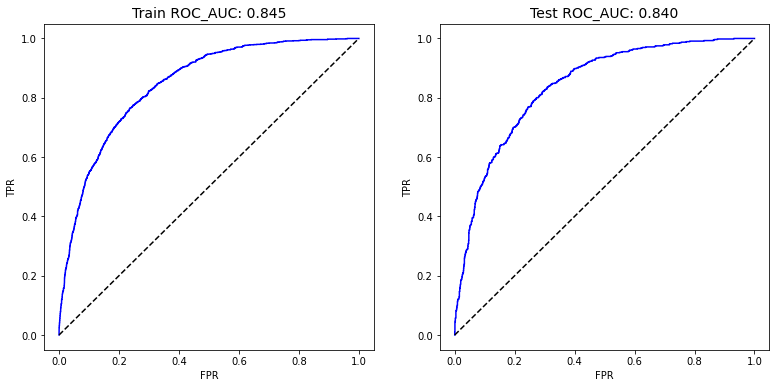

In [79]:
plot_roc_curve(X_train, y_train, X_test, y_test, logreg)

## Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
#bangun model
ranfor = RandomForestClassifier(random_state=42)

ranfor.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [82]:
#cari hasil training dan testing
y_train_pred = ranfor.predict(X_train)
y_test_pred = ranfor.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3622
           1       1.00      1.00      1.00      1308

    accuracy                           1.00      4930
   macro avg       1.00      1.00      1.00      4930
weighted avg       1.00      1.00      1.00      4930



Text(33.0, 0.5, 'Aktual')

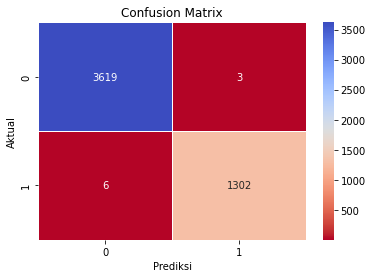

In [83]:
#DATA TRAIN
cnf_matrix = confusion_matrix(y_train, y_train_pred)
print(classification_report(y_train, y_train_pred))
sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

In [84]:
print("Accuracy Training data : ",metrics.accuracy_score(y_train,y_train_pred))
print("Recall Training data : ",metrics.recall_score(y_train,y_train_pred))
print("Precision Training data : ",metrics.precision_score(y_train,y_train_pred))
print("F-1 Training data : ",metrics.f1_score(y_train,y_train_pred))

Accuracy Training data :  0.9981744421906694
Recall Training data :  0.9954128440366973
Precision Training data :  0.9977011494252873
F-1 Training data :  0.9965556831228473


              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1552
           1       0.60      0.48      0.53       561

    accuracy                           0.78      2113
   macro avg       0.71      0.68      0.69      2113
weighted avg       0.76      0.78      0.77      2113



Text(33.0, 0.5, 'Aktual')

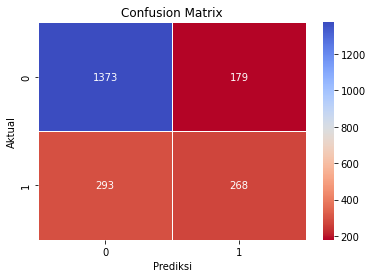

In [85]:
#DATA TEST
cnf_matrix = confusion_matrix(y_test, y_test_pred)
print(classification_report(y_test, y_test_pred))
sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

In [86]:
print("Accuracy Testing data : ",metrics.accuracy_score(y_test,y_test_pred))
print("Recall Testing data : ",metrics.recall_score(y_test,y_test_pred))
print("Precision Testing data : ",metrics.precision_score(y_test,y_test_pred))
print("F-1 Testing data : ",metrics.f1_score(y_test,y_test_pred))

Accuracy Testing data :  0.7766209181258874
Recall Testing data :  0.47771836007130125
Precision Testing data :  0.5995525727069351
F-1 Testing data :  0.5317460317460317


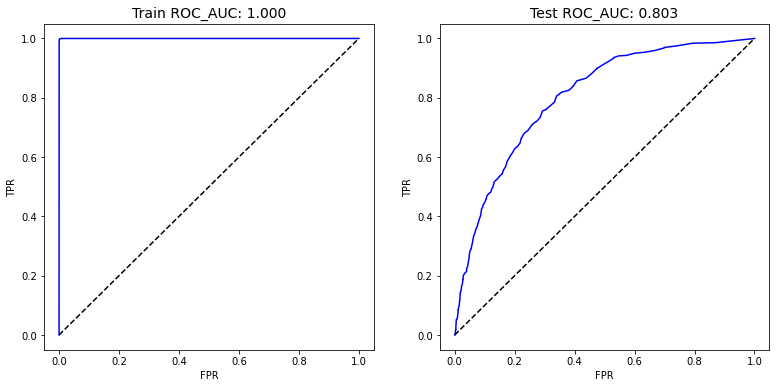

In [87]:
plot_roc_curve(X_train, y_train, X_test, y_test, ranfor)

## Decision Tree

In [88]:
from sklearn import tree

In [89]:
#bangun model
dc = tree.DecisionTreeClassifier(random_state=42)

dc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [90]:
#cari hasil training dan testing
y_train_pred = dc.predict(X_train)
y_test_pred = dc.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3622
           1       1.00      0.99      1.00      1308

    accuracy                           1.00      4930
   macro avg       1.00      1.00      1.00      4930
weighted avg       1.00      1.00      1.00      4930



Text(33.0, 0.5, 'Aktual')

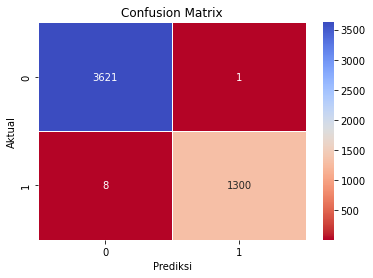

In [91]:
#DATA TRAIN
cnf_matrix = confusion_matrix(y_train, y_train_pred)
print(classification_report(y_train, y_train_pred))
sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

In [92]:
print("Accuracy Training data : ",metrics.accuracy_score(y_train,y_train_pred))
print("Recall Training data : ",metrics.recall_score(y_train,y_train_pred))
print("Precision Training data : ",metrics.precision_score(y_train,y_train_pred))
print("F-1 Training data : ",metrics.f1_score(y_train,y_train_pred))

Accuracy Training data :  0.9981744421906694
Recall Training data :  0.9938837920489296
Precision Training data :  0.9992313604919293
F-1 Training data :  0.9965504024530472


              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1552
           1       0.49      0.51      0.50       561

    accuracy                           0.73      2113
   macro avg       0.65      0.66      0.65      2113
weighted avg       0.73      0.73      0.73      2113



Text(33.0, 0.5, 'Aktual')

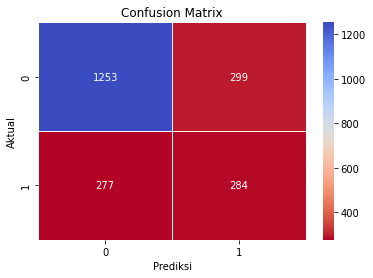

In [93]:
#DATA TEST
cnf_matrix = confusion_matrix(y_test, y_test_pred)
print(classification_report(y_test, y_test_pred))
sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

In [94]:
print("Accuracy Testing data : ",metrics.accuracy_score(y_test,y_test_pred))
print("Recall Testing data : ",metrics.recall_score(y_test,y_test_pred))
print("Precision Testing data : ",metrics.precision_score(y_test,y_test_pred))
print("F-1 Testing data : ",metrics.f1_score(y_test,y_test_pred))

Accuracy Testing data :  0.7274017983909133
Recall Testing data :  0.5062388591800356
Precision Testing data :  0.48713550600343053
F-1 Testing data :  0.49650349650349657


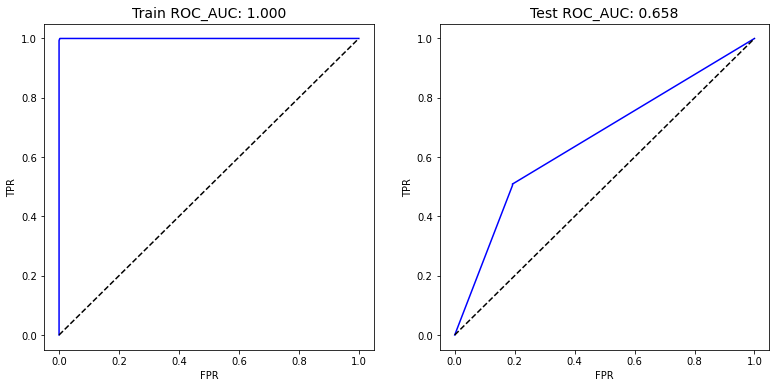

In [95]:
plot_roc_curve(X_train, y_train, X_test, y_test, dc)